In [15]:
include("eq1d_func.jl")

solve_heat_1D (generic function with 1 method)

# Poisson equation solver
$$-\triangle u = f$$

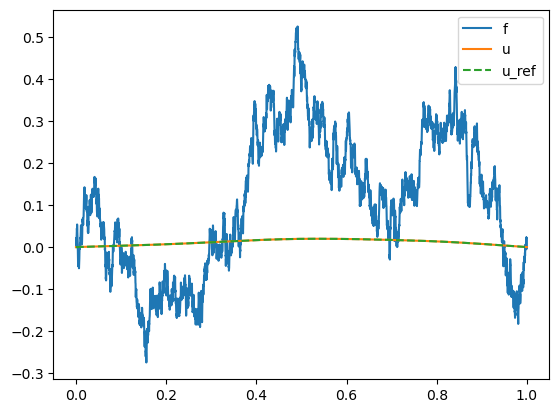

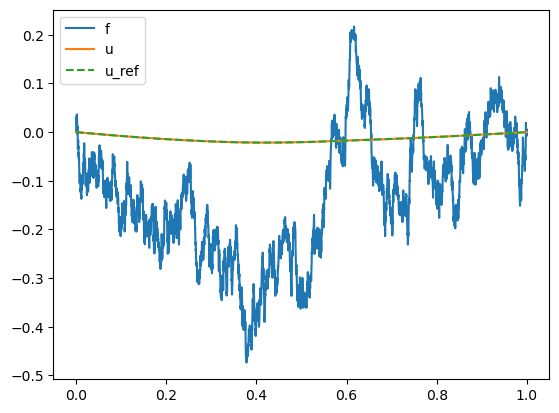

In [16]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^3; 2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11; 2^12]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))

for (i, Ne) in enumerate(Nes)
    fs = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    us_ref = generate_1d_poisson_ref(θs, Ne+1;  d=1.0, τ=3.0)
    us = zeros(Nθ, Ne+1)
    for j = 1:Nθ
        us[j, :] = solve_Poisson_1D(fs[j, :])
    end
    
    errors[i] = norm(us - us_ref)/Nθ/Ne
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, fs[j, :], label="f")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.plot(xx, us_ref[j, :], "--", label="u_ref")
            PyPlot.legend()
        end
    end
    
end

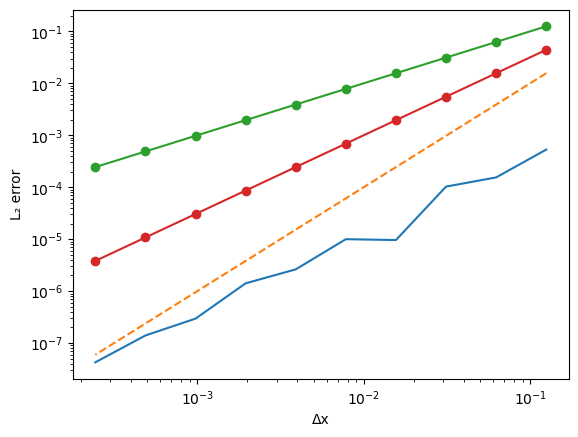

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [17]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs, "-o")
PyPlot.loglog(Δxs, Δxs.^(1.5), "-o")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 




# Darcy equation solver
$$-\nabla (a \nabla u) = f$$

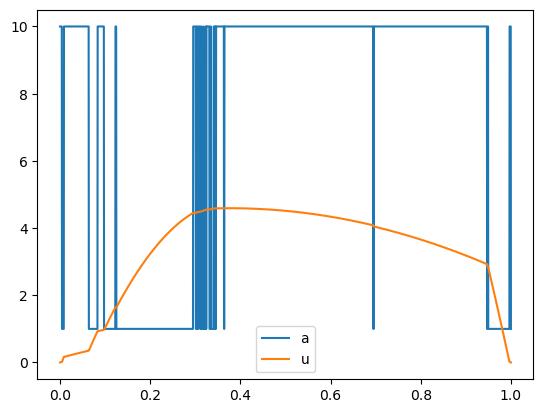

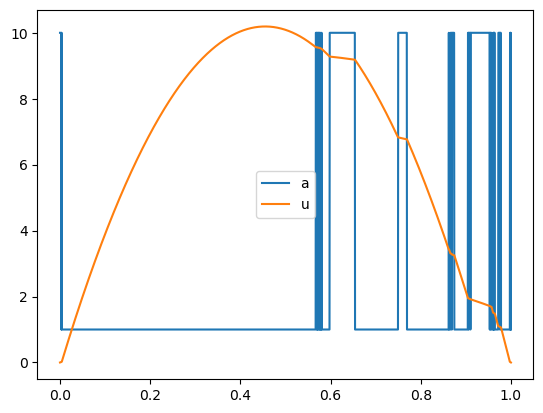

In [18]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^3; 2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))
a₊, a₋ = 10.0, 1.0

# compute reference solution
Ne_ref = 2^12
as = generate_1d_rf(θs, Ne_ref+1;  d=1.0, τ=3.0)
as[as .>= 0] .= a₊
as[as .< 0]  .= a₋
f = 100*ones(Ne_ref + 1)
us_ref = zeros(Nθ, Ne_ref + 1)
for j = 1:Nθ
    us_ref[j, :] = solve_Darcy_1D(as[j, :], f)
end


for (i, Ne) in enumerate(Nes)
    as  = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    as[as .>= 0] .= a₊
    as[as .< 0]  .= a₋
    
    f = 100*ones(Ne + 1)
    us = zeros(Nθ, Ne + 1)
    for j = 1:Nθ
        us[j, :] = solve_Darcy_1D(as[j, :], f)
    end
    
    errors[i] = norm(us - us_ref[:, 1:Int64(Ne_ref/Ne):end])/Nθ/Ne
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, as[j, :], label="a")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.legend()
        end
    end
    
end

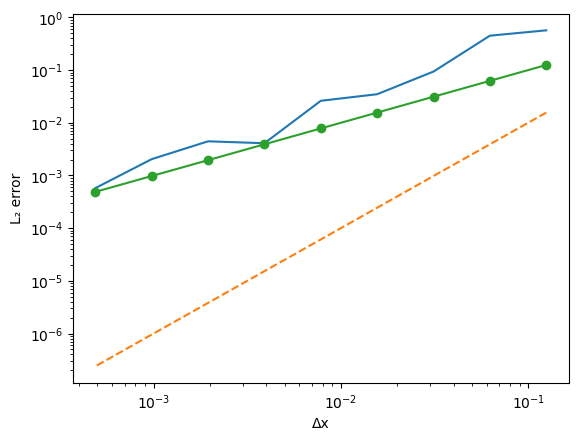

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [19]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs.^1, "-o")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 



# Heat equation
$$
u_t - \triangle u = f
$$

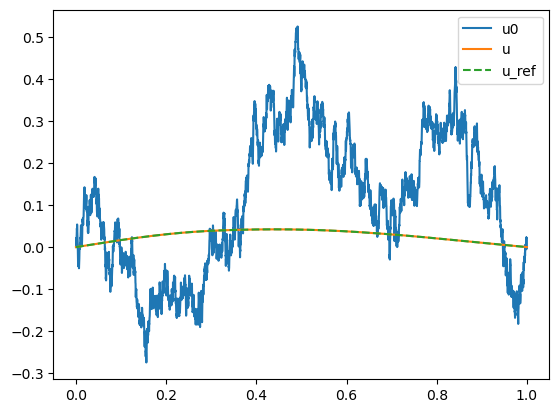

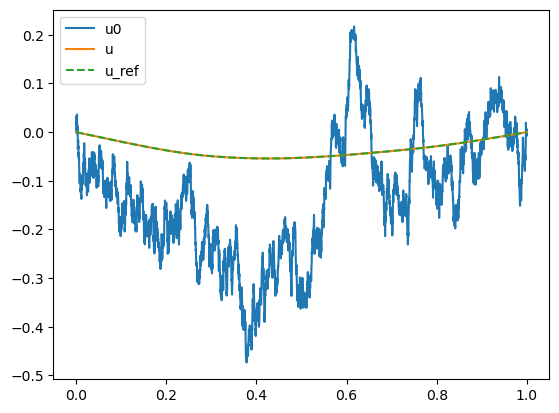

In [20]:
Random.seed!(42);

Nθ, Nk = 2, 2^14

θs = rand(Normal(0, 1), Nθ, Nk)
θᵖs = rand(Normal(0, 1), Nθ, Nk)

Nes = [2^4; 2^5; 2^6; 2^7; 2^8; 2^9; 2^10; 2^11; 2^12]
Δxs = 1.0 ./ Nes
errors = zeros(length(Nes))
T = 1.0/8

for (i, Ne) in enumerate(Nes)
    u0s  = generate_1d_rf(θs, Ne+1;  d=1.0, τ=3.0)
    fs  = generate_1d_rf(θᵖs, Ne+1;  d=1.0, τ=3.0)
    

    Δt = 1/Ne
    Nt = Int64(T/Δt)
    
    
    
    us = zeros(Nθ, Ne+1)
    for j = 1:Nθ
        us[j, :] = solve_heat_1D(u0s[j, :], fs[j, :], Δt, Nt)
    end
    
    us_ref = generate_1d_heat_ref(θs, θᵖs, Ne+1, T;  d=1.0, τ=3.0)
    errors[i] = norm(us - us_ref)/Nθ/Ne
    
    if i == length(Nes)
        for j = 1:Nθ
            PyPlot.figure()
            xx = LinRange(0,1,length(us[j, :]))
            PyPlot.plot(xx, u0s[j, :], label="u0")
#             PyPlot.plot(xx, fs[j, :], label="f")
            PyPlot.plot(xx, us[j, :], label="u")
            PyPlot.plot(xx, us_ref[j, :], "--", label="u_ref")
            PyPlot.legend()
        end
    end
    
end

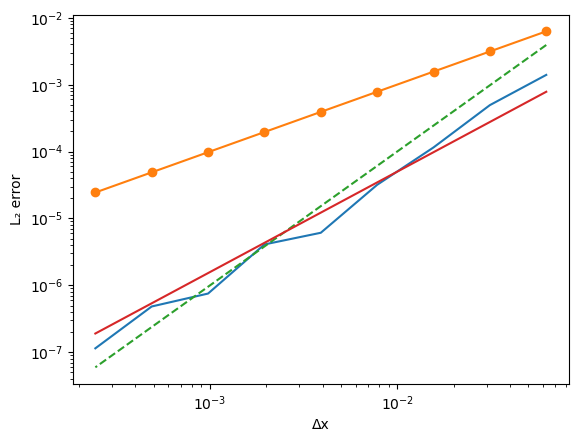

PyObject Text(24.000000000000007, 0.5, 'L₂ error')

In [21]:
PyPlot.figure()
PyPlot.loglog(Δxs, errors)
PyPlot.loglog(Δxs, Δxs/10, "-o")
PyPlot.loglog(Δxs, Δxs.^2, "--")
PyPlot.loglog(Δxs, Δxs.^1.5/20, "-")
PyPlot.xlabel("Δx")
PyPlot.ylabel("L₂ error") 


